In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/50_Startups.csv')

In [3]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### **Simple Linear Regression**

In [6]:
# Divide the data into X vs Y (dependent vs independent variable)

X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [7]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [8]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [9]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [10]:
len(X_train)

40

In [11]:
len(X_test)

10

In [14]:
## Reshape the X variables

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [15]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
## Creating the LR Model

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
## Predictions

y_pred = reg.predict(X_test)

In [19]:
y_pred

array([104104.41202149,  48416.62574288, 114932.67626992, 113432.43076791,
        68220.61162006, 110614.76233952,  87790.51707303, 130339.02739214,
       112265.30005217, 162895.40618398])

In [20]:
y_test

array([107404.34,  64926.08, 108552.04, 105733.54,  71498.49, 105008.31,
        96479.51, 125370.37, 110352.25, 156991.12])

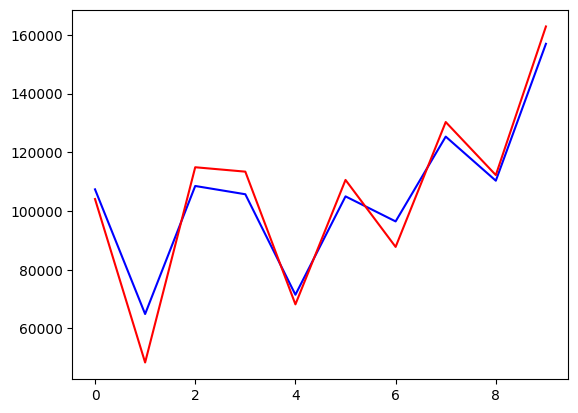

In [21]:
## Plotting predicted vs actual test data

plt.plot(y_test, color='blue',label='test')
plt.plot(y_pred, color='red',label='predictions')
plt.show()

In [22]:
## Regression Metrics

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

6424.822654818434

#### Predicting for a new record

In [26]:
data = [[235000]]

new_df = pd.DataFrame(data)

new_df = sc.transform(new_df)

single = reg.predict(new_df)

print(single)

[253097.93596492]


### **Multiple Linear Regression**

In [27]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [28]:
df_dummies = pd.get_dummies(df,drop_first=True)

In [29]:
df_dummies.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [30]:
## Dividing the data into X & y

X_mlr = df_dummies.drop(['Profit'],axis=1)
y_mlr = df_dummies.Profit

In [32]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr,y_mlr,test_size=0.2)

In [33]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_mlr = sc.fit_transform(X_train_mlr)
X_test_mlr = sc.transform(X_test_mlr)

In [34]:
## Create the MLR Model

from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()
reg2.fit(X_train_mlr,y_train_mlr)

LinearRegression()

In [35]:
y_pred2 = reg2.predict(X_test_mlr)

In [37]:
## Regression Metrics

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_mlr,y_pred2)

8708.309159910143

In [38]:
## Correlation

corr_matrix = df_dummies.corr()['Profit']

In [39]:
corr_matrix

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
State_Florida      0.116244
State_New York     0.031368
Name: Profit, dtype: float64

### **Multiple Linear Regression** - Removing the unwanted columns

In [40]:
df_dummies.head(5)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [42]:
## Dividing the data into X & y

X_mlr2 = df_dummies.drop(['Profit', 'Administration', 'State_Florida','State_New York'],axis=1)
y_mlr2 = df_dummies.Profit

In [44]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train_mlr2, X_test_mlr2, y_train_mlr2, y_test_mlr2 = train_test_split(X_mlr2,y_mlr2,test_size=0.2)

In [45]:
## Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_mlr2 = sc.fit_transform(X_train_mlr2)
X_test_mlr2 = sc.transform(X_test_mlr2)

In [46]:
## Create the MLR Model

from sklearn.linear_model import LinearRegression

reg3 = LinearRegression()
reg3.fit(X_train_mlr2,y_train_mlr2)

LinearRegression()

In [47]:
y_pred3 = reg3.predict(X_test_mlr2)

In [48]:
## Regression Metrics

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_mlr2,y_pred3)

7037.130301763429